In [1]:
pip install sklearn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# pre-processing imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# models imports
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

# metrics imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)

In [122]:
data = pd.read_csv("Day6_challenge.csv")
data.head()

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_thickness,lh_lingual_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_paracentral_thickness,lh_parsopercularis_thickness,lh_parsorbitalis_thickness,lh_parstriangularis_thickness,lh_pericalcarine_thickness,lh_postcentral_thickness,lh_posteriorcingulate_thickness,lh_precentral_thickness,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent_x,eTIV,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,CSF,Left-Accumbens-area,Left-VentralDC,Left-vessel,Left-choroid-plexus,Right-Lateral-Ventricle,Right-Inf-Lat-Vent,Right-Cerebellum-White-Matter,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-vessel,Right-choroid-plexus,5th-Ventricle,WM-hypointensities,Left-WM-hypointensities,Right-WM-hypointensities,non-WM-hypointensities,Left-non-WM-hypointensities,Right-non-WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,BrainSegVol,BrainSegVolNotVent_y,BrainSegVolNotVentSurf,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,DX_x,AGE,PTGENDER,PTEDUCAT,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,LDELTOTAL,TRABSCOR,FAQ,ICV,DX_y,mPACCdigit,mPACCtrailsB,Fusiform,Hippocampus,MidTemp,Ventricles,has_converted
0,1.479,2.408,2.137,1.664,3.129,2.468,2.286,2.551,1.481,2.138,2.640,1.679,2.020,2.163,2.787,1.631,2.641,2.078,2.009,1.538,1.781,2.363,2.537,2.074,2.126,1.995,3.001,2.116,2.778,2.155,3.011,2.581,2.266,2.480,2.26158,910666.0,1871210.0,22811.5,803.8,15898.6,46017.2,5951.6,2528.7,4615.0,1696.7,2557.8,1627.1,21584.4,3334.6,932.2,1114.7,347.7,2802.6,86.6,653.6,38345.1,92.2,16209.8,53397.0,6788.2,2385.9,4546.4,2409.3,4043.9,1208.6,399.5,3790.6,50.1,896.0,0.0,112.9,0.0,0.0,0.0,0.0,0.0,260.6,804.4,570.3,406.4,325.7,1033.0,1042120.0,945220.0,1084252.0,167292.0,204323.0,465666.0,235509.0,282302.0,380167.0,46112.0,627605.0,1018570.0,942173.0,1042400.0,1936395.0,0.636315,1.069040,49.0,6.0,119.0,1321571.0,CN,68.7,Male,16,4.6,9.17,12.54,10.0,25.0,36.0,3.0,2.0,0.0,109.0,0.0,1309858.0,CN,-10.414812,-2.555684,15652.0,5551.0,18870.0,34831.0,False
1,2.094,2.493,2.523,1.645,4.221,2.716,2.307,2.603,1.814,2.239,2.435,2.187,2.318,2.943,3.267,2.337,2.706,2.049,2.210,1.383,1.763,2.306,2.050,2.115,2.079,2.300,2.679,2.131,2.970,2.673,3.169,4.084,2.616,2.960,2.15542,1089867.0,1630791.0,29070.4,1212.6,15513.7,54098.8,7905.9,3654.4,4809.5,1854.3,1500.9,1778.0,21474.8,3594.9,1098.9,1094.0,604.8,4386.4,186.4,1392.3,14057.0,510.9,13927.2,55020.9,6012.5,4753.4,4638.4,2057.8,2888.1,2289.9,432.2,4309.4,90.4,1093.4,0.0,108.6,0.0,0.0,0.0,0.0,0.0,295.2,675.3,601.9,539.9,360.4,1146.7,895691.0,1360117.0,1333726.0,269556.0,224034.0,530828.0,267651.0,322000.0,459444.0,54524.0,733263.0,1154676.0,966488.0,1038037.0,1938058.0,0.721443,1.077377,46.0,17.0,40.0,1944552.0,CN,72.3,Male,17,0.2,3.65,5.72,2.0,30.0,52

In [146]:
data.columns.tolist()

['lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_superiortemporal_thickness',
 'lh_supramarginal_thickness',
 'lh_frontalpole_thickness'

In [132]:
data.shape

(9576, 127)

In [133]:
df_cognitive=data.loc[:,'CDRSB':'TRABSCOR']

In [120]:
df_cognitive

,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,LDELTOTAL,TRABSCOR
0,4.6,9.17,12.54,10.0,25.0,36.0,3.0,2.0,0.0,109.0
1,0.2,3.65,5.72,2.0,30.0,52.0,5.0,0.0,16.0,103.0
2,0.4,8.80,0.59,2.0,30.0,65.0,9.0,3.0,16.0,109.0
3,0.4,4.89,3.18,1.0,30.0,35.0,5.0,-0.0,18.0,71.0
4,0.3,2.80,4.94,2.0,30.0,33.0,3.0,10.0,13.0,113.0
...,...,...,...,...,...,...,...,...,...,...
9571,3.6,17.73,21.69,10.0,21.0,25.0,-0.0,8.0,9.0,309.0
9572,4.5,20.80,22.65,10.0,18.0,23.0,2.0,3.0,8.0,106.0
9573,0.0,8.22,7.15,8.0,26.0,31.0,2.0,5.0,9.0,171.0
9574,0.0,6.86,16.71,3.0,30.0,39.0,5.0,2.0,7.0,80.0


In [147]:
df_imaging=data[['lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_thickness',
 'lh_lateraloccipital_thickness',
 'lh_lateralorbitofrontal_thickness',
 'lh_lingual_thickness',
 'lh_medialorbitofrontal_thickness',
 'lh_middletemporal_thickness',
 'lh_parahippocampal_thickness',
 'lh_paracentral_thickness',
 'lh_parsopercularis_thickness',
 'lh_parsorbitalis_thickness',
 'lh_parstriangularis_thickness',
 'lh_pericalcarine_thickness',
 'lh_postcentral_thickness',
 'lh_posteriorcingulate_thickness',
 'lh_precentral_thickness',
 'lh_precuneus_thickness',
 'lh_rostralanteriorcingulate_thickness',
 'lh_rostralmiddlefrontal_thickness',
 'lh_superiorfrontal_thickness',
 'lh_superiorparietal_thickness',
 'lh_superiortemporal_thickness',
 'lh_supramarginal_thickness',
 'lh_frontalpole_thickness',
 'lh_temporalpole_thickness',
 'lh_transversetemporal_thickness',
 'lh_insula_thickness',
 'lh_MeanThickness_thickness',
 'BrainSegVolNotVent_x',
 'eTIV',
 'Left-Lateral-Ventricle',
 'Left-Inf-Lat-Vent',
 'Left-Cerebellum-White-Matter',
 'Left-Cerebellum-Cortex',
 'Left-Thalamus-Proper',
 'Left-Caudate',
 'Left-Putamen',
 'Left-Pallidum',
 '3rd-Ventricle',
 '4th-Ventricle',
 'Brain-Stem',
 'Left-Hippocampus',
 'Left-Amygdala',
 'CSF',
 'Left-Accumbens-area',
 'Left-VentralDC',
 'Left-vessel',
 'Left-choroid-plexus',
 'Right-Lateral-Ventricle',
 'Right-Inf-Lat-Vent',
 'Right-Cerebellum-White-Matter',
 'Right-Cerebellum-Cortex',
 'Right-Thalamus-Proper',
 'Right-Caudate',
 'Right-Putamen',
 'Right-Pallidum',
 'Right-Hippocampus',
 'Right-Amygdala',
 'Right-Accumbens-area',
 'Right-VentralDC',
 'Right-vessel',
 'Right-choroid-plexus',
 '5th-Ventricle',
 'WM-hypointensities',
 'Left-WM-hypointensities',
 'Right-WM-hypointensities',
 'non-WM-hypointensities',
 'Left-non-WM-hypointensities',
 'Right-non-WM-hypointensities',
 'Optic-Chiasm',
 'CC_Posterior',
 'CC_Mid_Posterior',
 'CC_Central',
 'CC_Mid_Anterior',
 'CC_Anterior',
 'BrainSegVol',
 'BrainSegVolNotVent_y',
 'BrainSegVolNotVentSurf',
 'lhCortexVol',
 'rhCortexVol',
 'CortexVol',
 'lhCerebralWhiteMatterVol',
 'rhCerebralWhiteMatterVol',
 'CerebralWhiteMatterVol',
 'SubCortGrayVol',
 'TotalGrayVol',
 'SupraTentorialVol',
 'SupraTentorialVolNotVent',
 'SupraTentorialVolNotVentVox',
 'MaskVol',
 'BrainSegVol-to-eTIV',
 'MaskVol-to-eTIV',
 'lhSurfaceHoles',
 'rhSurfaceHoles',
 'SurfaceHoles',
 'EstimatedTotalIntraCranialVol','Fusiform',
 'Hippocampus',
 'MidTemp',
 'Ventricles']]

In [148]:
cognitive_and_imaging= pd.concat([df_cognitive, df_imaging],axis=1)

In [149]:
X = (cognitive_and_imaging)
y = (data['has_converted'])
X.head()

,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,LDELTOTAL,TRABSCOR,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_thickness,lh_lingual_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_paracentral_thickness,lh_parsopercularis_thickness,lh_parsorbitalis_thickness,lh_parstriangularis_thickness,lh_pericalcarine_thickness,lh_postcentral_thickness,lh_posteriorcingulate_thickness,lh_precentral_thickness,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent_x,eTIV,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,CSF,Left-Accumbens-area,Left-VentralDC,Left-vessel,Left-choroid-plexus,Right-Lateral-Ventricle,Right-Inf-Lat-Vent,Right-Cerebellum-White-Matter,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-vessel,Right-choroid-plexus,5th-Ventricle,WM-hypointensities,Left-WM-hypointensities,Right-WM-hypointensities,non-WM-hypointensities,Left-non-WM-hypointensities,Right-non-WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,BrainSegVol,BrainSegVolNotVent_y,BrainSegVolNotVentSurf,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Fusiform,Hippocampus,MidTemp,Ventricles
0,4.6,9.17,12.54,10.0,25.0,36.0,3.0,2.0,0.0,109.0,1.479,2.408,2.137,1.664,3.129,2.468,2.286,2.551,1.481,2.138,2.640,1.679,2.020,2.163,2.787,1.631,2.641,2.078,2.009,1.538,1.781,2.363,2.537,2.074,2.126,1.995,3.001,2.116,2.778,2.155,3.011,2.581,2.266,2.480,2.26158,910666.0,1871210.0,22811.5,803.8,15898.6,46017.2,5951.6,2528.7,4615.0,1696.7,2557.8,1627.1,21584.4,3334.6,932.2,1114.7,347.7,2802.6,86.6,653.6,38345.1,92.2,16209.8,53397.0,6788.2,2385.9,4546.4,2409.3,4043.9,1208.6,399.5,3790.6,50.1,896.0,0.0,112.9,0.0,0.0,0.0,0.0,0.0,260.6,804.4,570.3,406.4,325.7,1033.0,1042120.0,945220.0,1084252.0,167292.0,204323.0,465666.0,235509.0,282302.0,380167.0,46112.0,627605.0,1018570.0,942173.0,1042400.0,1936395.0,0.636315,1.069040,49.0,6.0,119.0,1321571.0,15652.0,5551.0,18870.0,34831.0
1,0.2,3.65,5.72,2.0,30.0,52.0,5.0,0.0,16.0,103.0,2.094,2.493,2.523,1.645,4.221,2.716,2.307,2.603,1.814,2.239,2.435,2.187,2.318,2.943,3.267,2.337,2.706,2.049,2.210,1.383,1.763,2.306,2.050,2.115,2.079,2.300,2.679,2.131,2.970,2.673,3.169,4.084,2.616,2.960,2.15542,1089867.0,1630791.0,29070.4,1212.6,15513.7,54098.8,7905.9,3654.4,4809.5,1854.3,1500.9,1778.0,21474.8,3594.9,1098.9,1094.0,604.8,4386.4,186.4,1392.3,14057.0,510.9,13927.2,55020.9,6012.5,4753.4,4638.4,2057.8,2888.1,2289.9,432.2,4309.4,90.4,1093.4,0.0,108.6,0.0,0.0,0.0,0.0,0.0,295.2,675.3,601.9,539.9,360.4,1146.7,895691.0,1360117.0,1333726.0,269556.0,224034.0,530828.0,267651.0,322000.0,459444.0,54524.0,733263.0,1154676.0,966488.0,1038037.0,1938058.0,0.721443,1.077377,46.0,17.0,40.0,1944552.0,18518.0,8793.0,24347.0,14742.0
2,0.4,8.80,0.59,2.0,30.0,65.0,9.0,3.0,16.0,109.0,2.351,2.541,2.037,1.950,2.494,2.695,2.543,2.725,1.79

In [150]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: has_converted, dtype: bool

In [151]:
print(X.shape)
print(y.shape)

(9576, 117)
(9576,)


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12, shuffle=True, stratify=y)

In [153]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7182, 117)
(7182,)
(2394, 117)
(2394,)


In [154]:
print(y_train.value_counts(normalize = True))
print('\n')
print(y_test.value_counts(normalize = True))

False    0.83946
True     0.16054
Name: has_converted, dtype: float64


False    0.839599
True     0.160401
Name: has_converted, dtype: float64


In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: num must be 1 <= num <= 15, not 16

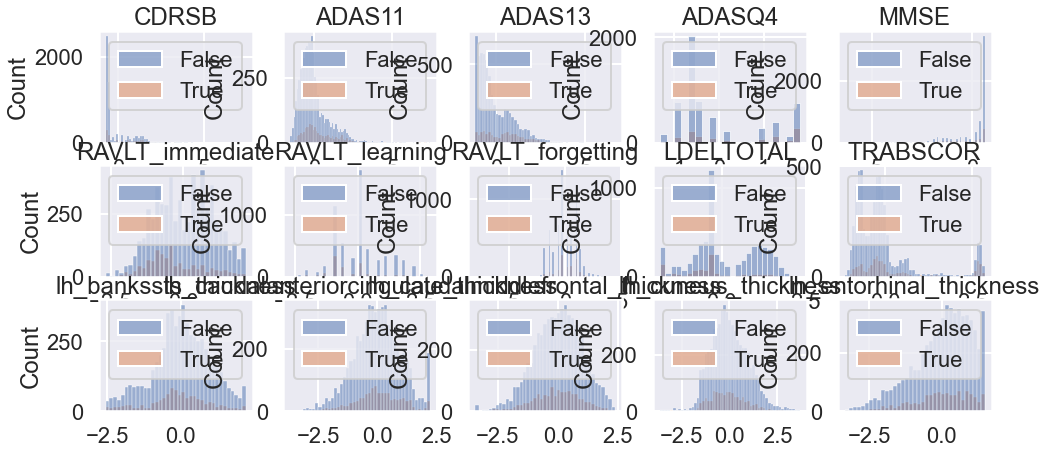

In [156]:
plt.figure(figsize = (16,7))
for i,col in enumerate(cognitive_and_imaging):
    plt.subplot(3, 5, i+1)
    sns.histplot(x = X_train[:,i], hue = y_train.values)
    plt.title(col)
plt.tight_layout()

In [172]:
# Initialise the classifier

classifier = SVC(class_weight='balanced', random_state=10, kernel = "linear")

# Train a Support Vector Machines classifier

classifier.fit(X_train, y_train)

# Get predictions for the training and testing sets

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [173]:
y_pred_test, len(y_pred_test)

(array([False,  True, False, ..., False,  True, False]), 2394)

In [174]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training set accuracy: ", accuracy_train)
print("Testing set accuracy: ", accuracy_test)

Training set accuracy:  0.6701475912002228
Testing set accuracy:  0.677109440267335


In [175]:
confusion_mat = confusion_matrix(y_test, y_pred_test)
confusion_mat

array([[1410,  600],
       [ 173,  211]])

Text(0.5, -3.5, 'Predicted Labels')

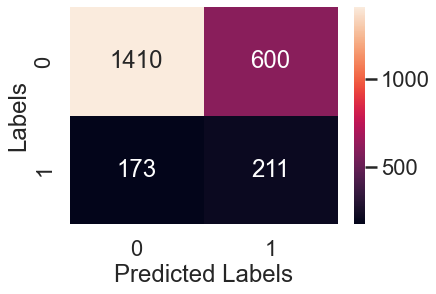

In [176]:
sns.set_theme("poster")
sns.heatmap(confusion_mat, annot = True, fmt='g')
plt.ylabel("Labels")
plt.xlabel("Predicted Labels")

In [177]:
# Initiate k-fold splits

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
accuracies = []

# loop through the folds

for train_index, test_index in kfolds.split(X, y):
    
    # Obtain the different folds, or data subsets
    X_train, X_test = X.loc[train_index], X.loc[test_index]    
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    # Scale the datasets
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the classifier
    classifier = SVC(class_weight='balanced', random_state=12)
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    
    # Get accurancy on current test fold
    accuracies.append(accuracy_score(y_test, y_pred_test))

In [178]:
accuracies

[0.704070981210856,
 0.7148825065274151,
 0.7018276762402089,
 0.7138381201044386,
 0.7044386422976502]

In [179]:
np.mean(accuracies)

0.7078115852761139

In [180]:
#PART 3

In [192]:
X = cognitive_and_imaging.drop(['ADAS13'], axis = 1)
y = np.round(data['ADAS13'])

In [194]:
X

,CDRSB,ADAS11,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,LDELTOTAL,TRABSCOR,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,lh_lateralorbitofrontal_thickness,lh_lingual_thickness,lh_medialorbitofrontal_thickness,lh_middletemporal_thickness,lh_parahippocampal_thickness,lh_paracentral_thickness,lh_parsopercularis_thickness,lh_parsorbitalis_thickness,lh_parstriangularis_thickness,lh_pericalcarine_thickness,lh_postcentral_thickness,lh_posteriorcingulate_thickness,lh_precentral_thickness,lh_precuneus_thickness,lh_rostralanteriorcingulate_thickness,lh_rostralmiddlefrontal_thickness,lh_superiorfrontal_thickness,lh_superiorparietal_thickness,lh_superiortemporal_thickness,lh_supramarginal_thickness,lh_frontalpole_thickness,lh_temporalpole_thickness,lh_transversetemporal_thickness,lh_insula_thickness,lh_MeanThickness_thickness,BrainSegVolNotVent_x,eTIV,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,CSF,Left-Accumbens-area,Left-VentralDC,Left-vessel,Left-choroid-plexus,Right-Lateral-Ventricle,Right-Inf-Lat-Vent,Right-Cerebellum-White-Matter,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-vessel,Right-choroid-plexus,5th-Ventricle,WM-hypointensities,Left-WM-hypointensities,Right-WM-hypointensities,non-WM-hypointensities,Left-non-WM-hypointensities,Right-non-WM-hypointensities,Optic-Chiasm,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,BrainSegVol,BrainSegVolNotVent_y,BrainSegVolNotVentSurf,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Fusiform,Hippocampus,MidTemp,Ventricles
0,4.6,9.17,10.0,25.0,36.0,3.0,2.0,0.0,109.0,1.479,2.408,2.137,1.664,3.129,2.468,2.286,2.551,1.481,2.138,2.640,1.679,2.020,2.163,2.787,1.631,2.641,2.078,2.009,1.538,1.781,2.363,2.537,2.074,2.126,1.995,3.001,2.116,2.778,2.155,3.011,2.581,2.266,2.480,2.26158,910666.0,1871210.0,22811.5,803.8,15898.6,46017.2,5951.6,2528.7,4615.0,1696.7,2557.8,1627.1,21584.4,3334.6,932.2,1114.7,347.7,2802.6,86.6,653.6,38345.1,92.2,16209.8,53397.0,6788.2,2385.9,4546.4,2409.3,4043.9,1208.6,399.5,3790.6,50.1,896.0,0.0,112.9,0.0,0.0,0.0,0.0,0.0,260.6,804.4,570.3,406.4,325.7,1033.0,1042120.0,945220.0,1084252.0,167292.0,204323.0,465666.0,235509.0,282302.0,380167.0,46112.0,627605.0,1018570.0,942173.0,1042400.0,1936395.0,0.636315,1.069040,49.0,6.0,119.0,1321571.0,15652.0,5551.0,18870.0,34831.0
1,0.2,3.65,2.0,30.0,52.0,5.0,0.0,16.0,103.0,2.094,2.493,2.523,1.645,4.221,2.716,2.307,2.603,1.814,2.239,2.435,2.187,2.318,2.943,3.267,2.337,2.706,2.049,2.210,1.383,1.763,2.306,2.050,2.115,2.079,2.300,2.679,2.131,2.970,2.673,3.169,4.084,2.616,2.960,2.15542,1089867.0,1630791.0,29070.4,1212.6,15513.7,54098.8,7905.9,3654.4,4809.5,1854.3,1500.9,1778.0,21474.8,3594.9,1098.9,1094.0,604.8,4386.4,186.4,1392.3,14057.0,510.9,13927.2,55020.9,6012.5,4753.4,4638.4,2057.8,2888.1,2289.9,432.2,4309.4,90.4,1093.4,0.0,108.6,0.0,0.0,0.0,0.0,0.0,295.2,675.3,601.9,539.9,360.4,1146.7,895691.0,1360117.0,1333726.0,269556.0,224034.0,530828.0,267651.0,322000.0,459444.0,54524.0,733263.0,1154676.0,966488.0,1038037.0,1938058.0,0.721443,1.077377,46.0,17.0,40.0,1944552.0,18518.0,8793.0,24347.0,14742.0
2,0.4,8.80,2.0,30.0,65.0,9.0,3.0,16.0,109.0,2.351,2.541,2.037,1.950,2.494,2.695,2.543,2.725,1.792,2.354,2.606,1.784,2.4

In [195]:
print(y.min())
print(y.max())
print(y.mean())
print(y.isnull().sum())

0.0
77.0
11.427422723475354
0


Text(0, 0.5, 'Count')

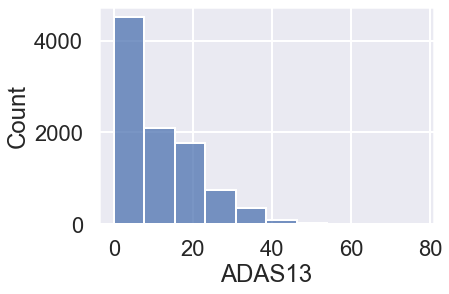

In [196]:
sns.histplot(y, bins=10)
plt.xlabel("ADAS13")
plt.ylabel("Count")
#mean around 0

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, shuffle=True)

In [198]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [199]:
# Intialise regression algorithm
lin_reg = LinearRegression()

# Train regression model
lin_reg.fit(X_train,y_train)

# Predict the score
y_pred = lin_reg.predict(X_test)

In [200]:
# Print mean square error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Print coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 42.58
Coefficient of determination: 0.54


Text(0, 0.5, 'ADAS13 pred')

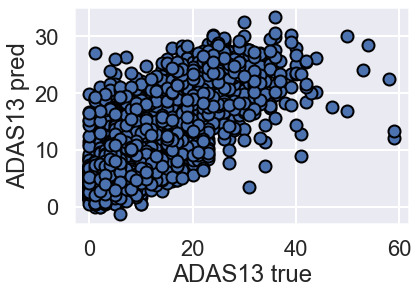

In [201]:
plt.scatter(y_test, y_pred, edgecolors='black')
plt.xlabel("ADAS13 true")
plt.ylabel("ADAS13 pred")

In [202]:
np.corrcoef(y_test, y_pred)

array([[1.        , 0.73387585],
       [0.73387585, 1.        ]])